      USD_Worldwide_Gross
1                       0
6                       0
8                       0
17                      0
27                      0
...                   ...
5386                    0
5387                    0
5388                    0
5389                    0
5390                    0

[357 rows x 1 columns]
      USD_Production_Budget
1                    385907
6                   2000000
8                   4000000
17                  1200000
27                  1250000
...                     ...
5386               15000000
5387              160000000
5388              175000000
5389               50000000
5390               20000000

[357 rows x 1 columns]


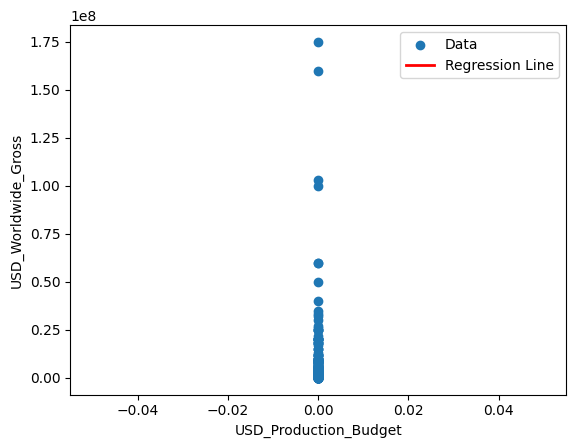

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

df = pd.read_csv("data/cost_revenue_dirty.csv")

chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']

for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        df[col] = df[col].astype(str).str.replace(char, "")
    # Convert column to a numeric data type
    df[col] = pd.to_numeric(df[col])
df.Release_Date = pd.to_datetime(df.Release_Date)
budget_gross = df.USD_Production_Budget > df.USD_Domestic_Gross
budget_gross.value_counts()

budget_zero = df.USD_Worldwide_Gross == 0
budget_zero.value_counts()

zero_worldwide = df[df.USD_Worldwide_Gross == 0]
zero_worldwide.sort_values('USD_Production_Budget',ascending=False)
international_flop = df.loc[(df.USD_Production_Budget != 0)&
                            (df.USD_Worldwide_Gross == 0)]
international_flop.value_counts()

df.query('USD_Production_Budget !=0 & USD_Worldwide_Gross == 0',inplace=True)
df
scrap = pd.Timestamp("1/1/2018")

# plt.figure(figsize=(8,4), dpi=200)
# ax = sns.scatterplot(data=df,
#                      x='USD_Production_Budget', 
#                      y='USD_Worldwide_Gross',
#                      hue='USD_Worldwide_Gross', # colour
#                      size='USD_Worldwide_Gross',) # dot size

# ax.set(ylim=(0, 3000000000),
#        xlim=(0, 450000000),
#        ylabel='Revenue in $ billions',
#        xlabel='Budget in $100 millions',)

# plt.show()

dates = pd.DatetimeIndex(df.Release_Date)
years = dates.year
decades = years//10*10
df["Decades"] = decades

old_film = df[df.Decades < 1970]
new_film = df[df.Decades > 1970]

# old_film.sort_values("USD_Production_Budget",ascending=False).head()
# sns.regplot(data=old_film, 
#             x='USD_Production_Budget',
#             y='USD_Worldwide_Gross')
# plt.figure(figsize=(8,4), dpi=200)
# with sns.axes_style("whitegrid"):
#   sns.regplot(data=old_film, 
#             x='USD_Production_Budget', 
#             y='USD_Worldwide_Gross',
#             scatter_kws = {'alpha': 0.4},
#             line_kws = {'color': 'black'})
  
  
regression = LinearRegression()
x = pd.DataFrame(df,columns=['USD_Worldwide_Gross'])
print(x)


y = pd.DataFrame(df,columns=['USD_Production_Budget'])
print(y)
regression.fit(x,y)
regression.intercept_

regression.coef_

plt.scatter(x, y, label='Data')
plt.plot(x, regression.predict(x), color='red', linewidth=2, label='Regression Line')
plt.xlabel('USD_Production_Budget')
plt.ylabel('USD_Worldwide_Gross')
plt.legend()
plt.show()

